# 1) Logistic Regression

In [55]:
#importing necessary libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import sklearn

In [57]:
#loading iris dataset

In [58]:
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['Species'])
dataset.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [59]:
#Splitting the dataset into training and test set

In [60]:
X = dataset.iloc[:, [0,1,2,3]].values
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:
# Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
# Fitting Logistic Regression to the training set

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
# Predicting the test set results

In [66]:
y_pred = classifier.predict(X_test)

In [67]:
# Predict probabilities

In [68]:
probs_y=classifier.predict_proba(X_test)

In [69]:
# Print results

In [70]:
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2.0        | 2.0        | 0.0        | 0.03          | 0.97      
1.0        | 1.0        | 0.01       | 0.95          | 0.04      
0.0        | 0.0        | 1.0        | 0.0           | 0.0       
2.0        | 2.0        | 0.0        | 0.08          | 0.92      
0.0        | 0.0        | 0.98       | 0.02          | 0.0       
2.0        | 2.0        | 0.0        | 0.01          | 0.99      
0.0        | 0.0        | 0.98       | 0.02          | 0.0       
1.0        | 1.0        | 0.01       | 0.71          | 0.28      
1.0        | 1.0        | 0.0        | 0.73          | 0.27      
1.0        | 1.0        | 0.02       | 0.89          | 0.08      
2.0        | 2.0        | 0.0        | 0.44          | 0.56      
1.0        | 1.0        | 0.02       | 0.76          | 0.22      
1.0        | 1.0        | 0.01       | 0.85          | 0.13      
1.0     

In [71]:
# Making COnfusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [73]:
# Plot Confusion Matrix

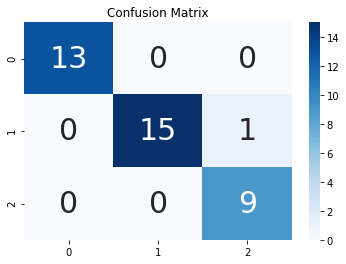

In [75]:
import seaborn as sns
import pandas as pd
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# Support Vector Machine

In [ ]:
#loading libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [ ]:
# creating sample dataset

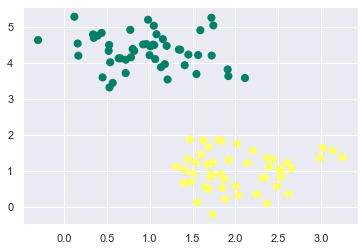

In [78]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

In [ ]:
# implementing SVM

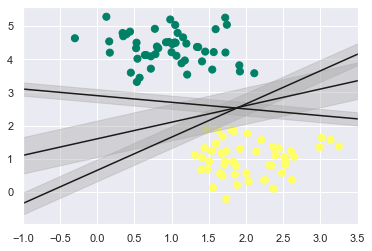

In [80]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
   yfit = m * xfit + b
   plt.plot(xfit, yfit, '-k')
   plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
         color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

# Decision Tree

In [ ]:
# importing libraries

In [94]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# download the dataset

In [95]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(r"D:\pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Split the dataset

In [96]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# train the model and make prediction

In [97]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
# getting accuracy score, confusion matrix  and classification report

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[116  30]
 [ 45  40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       146
           1       0.57      0.47      0.52        85

    accuracy                           0.68       231
   macro avg       0.65      0.63      0.64       231
weighted avg       0.67      0.68      0.67       231

Accuracy: 0.6753246753246753


In [ ]:
# Visualizing Decision Tree

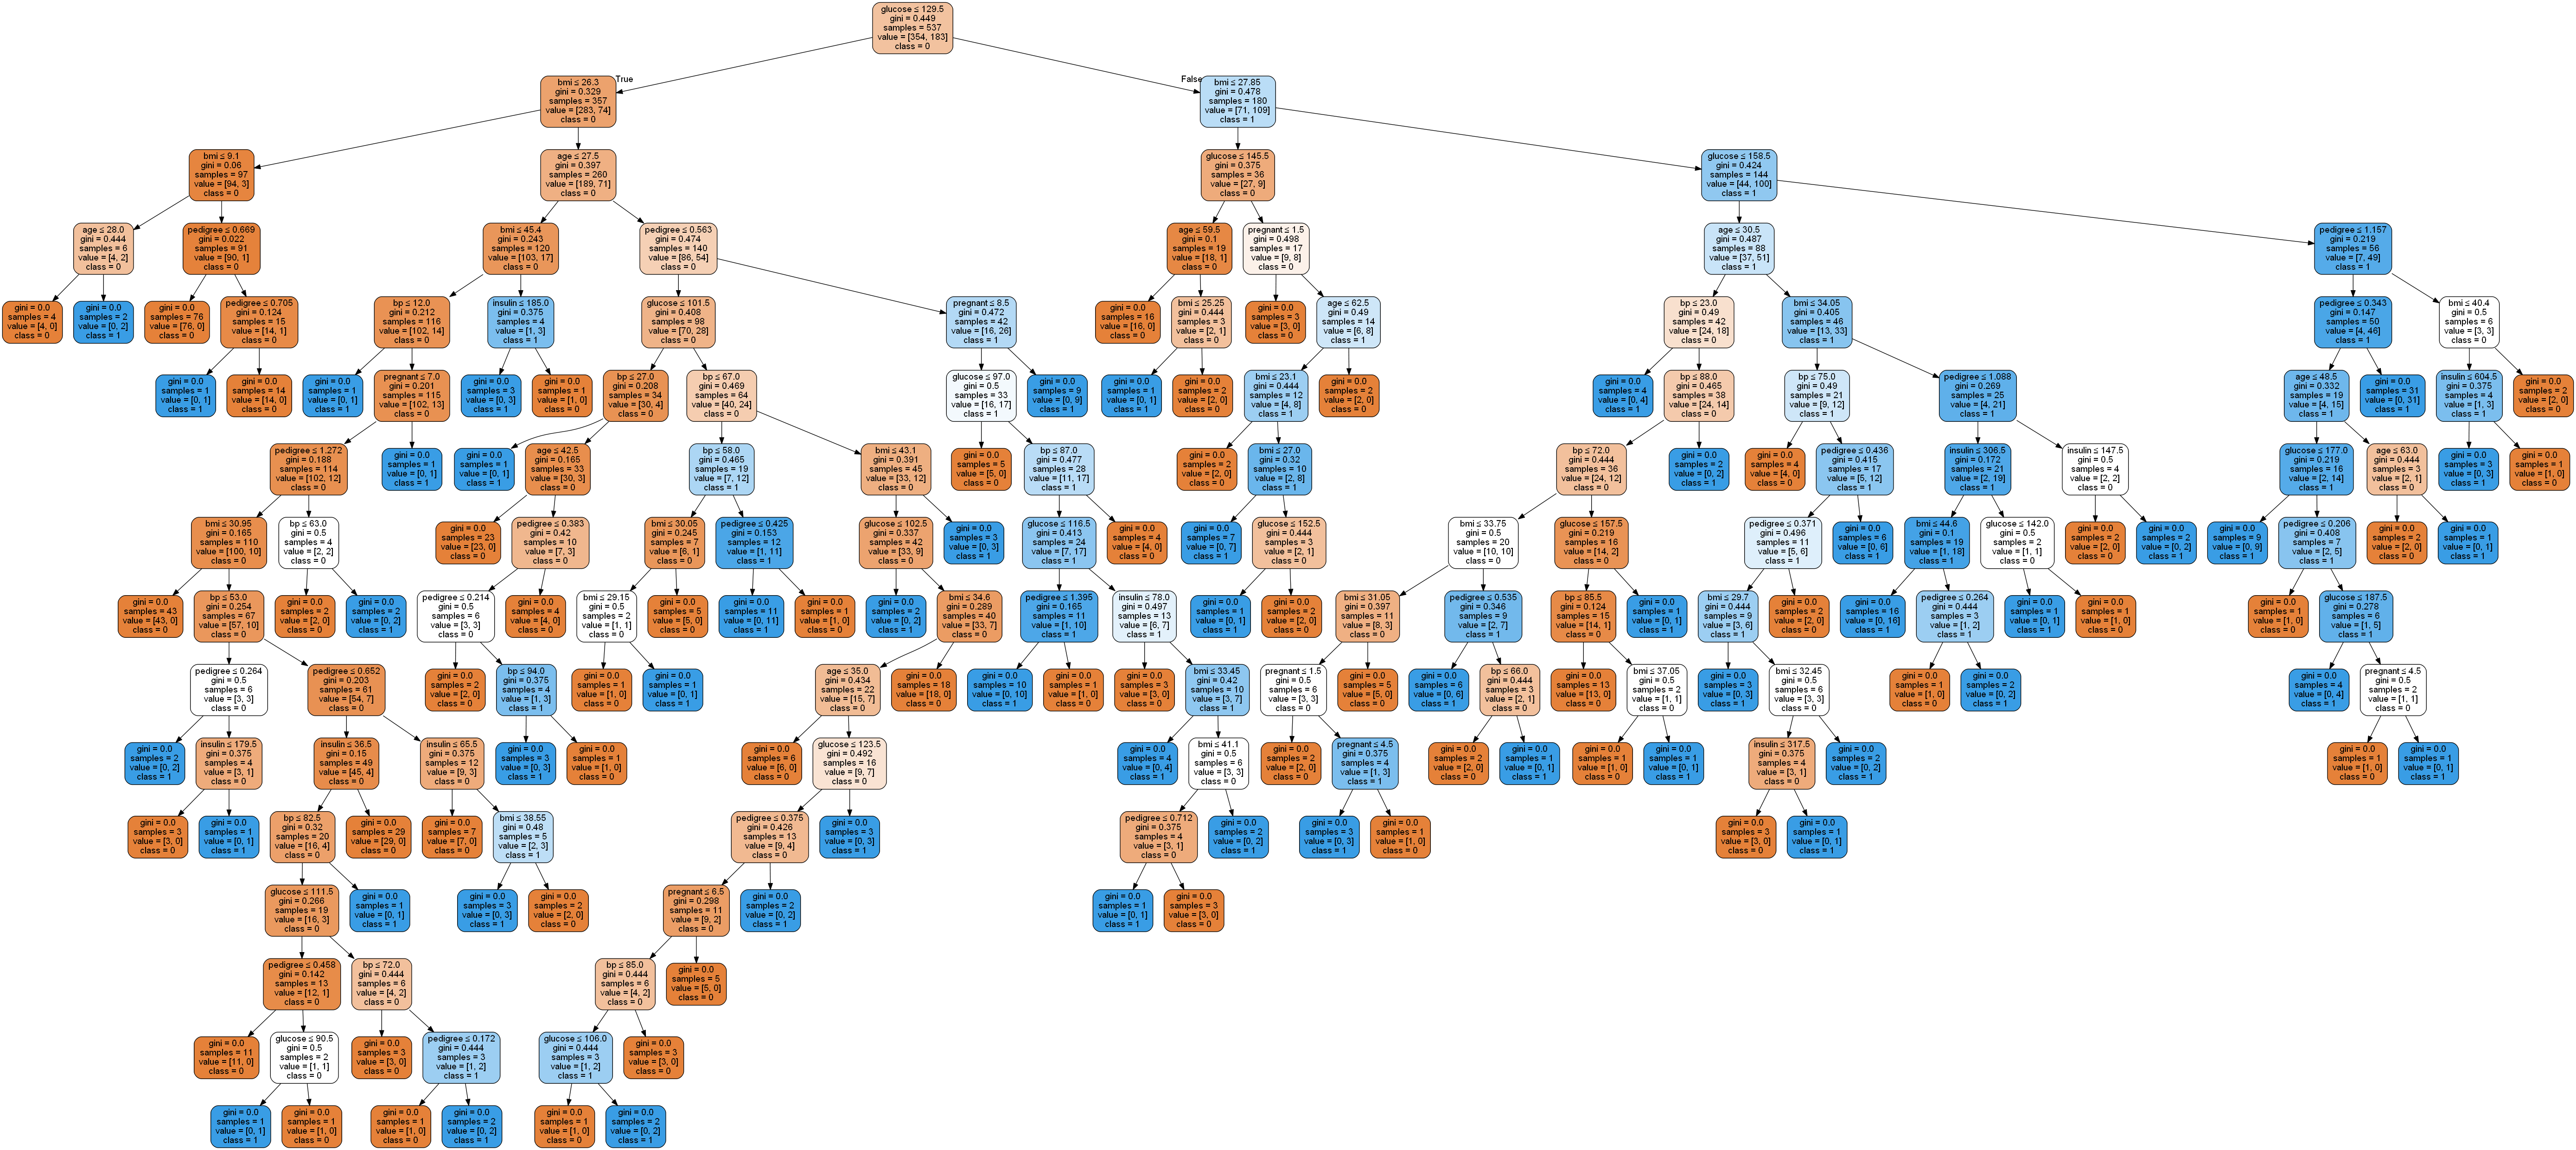

In [104]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())

# Naïve Bayes Algorithm

In [ ]:
# importing packages

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# making use of make_blobs() function to generate blobs of points with Gaussian distribution

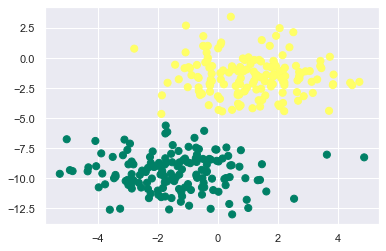

In [106]:
from sklearn.datasets import make_blobs
X, y = make_blobs(300, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

In [ ]:
# import GaussianNB

In [114]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X, y);

In [125]:
# make prediction

In [115]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model_GNB.predict(Xnew)

In [ ]:
# plotting new data to find its boundaries

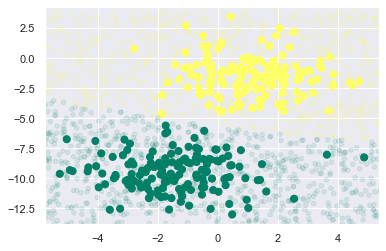

In [116]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='summer', alpha=0.1)
plt.axis(lim);

In [ ]:
# posterior probabilities of first and second label

In [117]:
yprob = model_GNB.predict_proba(Xnew)
yprob[-10:].round(3)

array([[0.998, 0.002],
       [1.   , 0.   ],
       [0.987, 0.013],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.986, 0.014]])

# Random Forest Algorithm

In [ ]:
# importing packages

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# download dataset

In [119]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
# assign column names & read to pandas DataFrame

In [120]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names=headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# data processing and splitting

In [121]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# train with RandomForestClassifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
# make prediction

In [123]:
y_pred = classifier.predict(X_test)

In [ ]:
# printing results

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0  0]
 [ 0 16  2]
 [ 0  4 12]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.80      0.89      0.84        18
 Iris-virginica       0.86      0.75      0.80        16

       accuracy                           0.87        45
      macro avg       0.89      0.88      0.88        45
   weighted avg       0.87      0.87      0.87        45

Accuracy: 0.8666666666666667
